In [1]:
#install python (and check the add to path option during installation), then install the ema_workbench python module.
#this can be done by executing the following command in the command prompt:
# pip install ema_workbench

#import necessary python libraries for the analysis
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#import EMA workbench tools
from ema_workbench.em_framework import samplers, evaluators, util
from ema_workbench import (RealParameter, ScalarOutcome, Model, Constant)
from ema_workbench import (perform_experiments, ema_logging, save_results, 
                           load_results, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)


#import PRIM algorithm
from ema_workbench.analysis import prim

C:\Users\Timme\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Timme\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


# 1. Specify uncertainties

Only local analysis values are used, so to make benefit transfer possible for the case-study of Quartier Alzette (Esch-sur-Alzette, Luxembourg)

In [4]:
raw_data = pd.read_csv("Data/Costs and benefits of photovoltaic-green roofs.csv")

In [5]:
# Selection of local analysis' data

local_items = raw_data[((raw_data["Technology"] == "Green roof") | 
                         (raw_data["Technology"] == "Photovoltaic-green roof") ) &
                        (raw_data["Base case roof"] == "black roof") &
                        (raw_data["Climate"] == "Cfb") &
                        (raw_data["Continent"] == "Europe") &
                        (raw_data["Unusable monetary value"] != "x") &
                        ((raw_data["Item"] == "Urban heat island effect mitigation") |
                        (raw_data["Item"] == "Water runoff quality increase") |
                        (raw_data["Item"] == "Urban noise reduction") |
                        (raw_data["Item"] == "Biodiversity enhancement") |
                        (raw_data["Item"] == "Energy consumption reduction (heating and cooling)") |
                        (raw_data["Item"] == "Sound insulation") |
                        (raw_data["Item"] == "Aesthetics increase") |
                        (raw_data["Item"] == "Replacement and disposal of green roof") |
                        (raw_data["Item"] == "Installation of green roof (net)") |
                        (raw_data["Item"] == "Longevity increase") |
                        (raw_data["Item"] == "Fire risk reduction") |
                        (raw_data["Item"] == "Maintenance of green roof (net)") |
                        (raw_data["Item"] == "Air quality enhancement") |
                        (raw_data["Item"] == "CO2 emission reduction") |
                        (raw_data["Item"] == "Stormwater management") |
                        (raw_data["Item"] == "Air pollution from green roof production") |
                        (raw_data["Item"] == "CO2 emissions from green roof production") |
                        (raw_data["Item"] == "CO2 uptake") |
                        (raw_data["Item"] == "Electricity generation") |
                        (raw_data["Item"] == "Water runoff quality increase") |
                        (raw_data["Item"] == "Local area's aesthetics increase") |
                        (raw_data["Item"] == "Installation of PV panels"))]

local_items = local_items[["Item","Item type", "Actual year(s) at which the item is accounted", "Adjusted Monetary value [EU27 2020 €/m2]"]]

local_costs = local_items[ (local_items["Item type"]=="cost") ]
local_benefits = local_items[ (local_items["Item type"]=="benefit") ]
display(local_costs)
display(local_benefits)

,Item,Item type,Actual year(s) at which the item is accounted,Adjusted Monetary value [EU27 2020 €/m2]
159,Installation of green roof (net),cost,0,33.212560
160,Maintenance of green roof (net),cost,every year,1.082310
161,Installation of green roof (net),cost,0,34.841625
162,Installation of green roof (net),cost,0,31.583495
163,Maintenance of green roof (net),cost,every year,1.079255
164,Maintenance of green roof (net),cost,every year,1.085364
322,Installation of green roof (net),cost,0,74.175124
323,Installation of green roof (net),cost,0,92.718905
324,Installation of green roof (net),cost,0,69.539179
325,Installation of green roof (net),cost,0,74.175124


,Item,Item type,Actual year(s) at which the item is accounted,Adjusted Monetary value [EU27 2020 €/m2]
172,Sound insulation,benefit,every year,0.292214
173,Sound insulation,benefit,every year,0.277959
174,Sound insulation,benefit,every year,0.306468
175,Longevity increase,benefit,every year,7.343010
176,Longevity increase,benefit,every year,7.343010
177,Longevity increase,benefit,every year,7.343010
178,Air quality enhancement,benefit,every year,0.375703
179,Air quality enhancement,benefit,every year,0.012625
180,Air quality enhancement,benefit,every year,0.499919
181,Urban heat island effect mitigation,benefit,every year,0.000000


In [6]:
# Visualize the years at which the costs and benefits need to be accounted in the CBA Model

local_costs.groupby("Item")["Actual year(s) at which the item is accounted"].agg(lambda x:x.value_counts().index[0])

Item
Installation of green roof (net)             0
Maintenance of green roof (net)     every year
Name: Actual year(s) at which the item is accounted, dtype: object

In [7]:
local_benefits.groupby("Item")["Actual year(s) at which the item is accounted"].agg(lambda x:x.value_counts().index[0])

Item
Aesthetics increase                                            0
Air quality enhancement                               every year
Biodiversity enhancement                              every year
CO2 emission reduction                                every year
CO2 uptake                                            every year
Energy consumption reduction (heating and cooling)    every year
Fire risk reduction                                   every year
Longevity increase                                    every year
Sound insulation                                      every year
Stormwater management                                 every year
Urban heat island effect mitigation                   every year
Water runoff quality increase                         every year
Name: Actual year(s) at which the item is accounted, dtype: object

In [64]:
# determining the amount of datapoints within the range, so to gain insight into the representativeness of the using the range (i.e., max-min) for each 
# cost or benefit

def q1(Item):
    return Item.quantile(0.25)

def q2(Item):
    return Item.quantile(0.75)

def coverage(Item):
    return Item.nunique()/ ( Item.max() - Item.min() )

def values_not_covered(Item):
    return ( Item.max() - Item.min() ) / Item.nunique()

f = {'Adjusted Monetary value [EU27 2020 €/m2]': ['min', q1, 'median', q2, 'max']}
summary_costs = local_costs.groupby('Item').agg(f)

# drop one level of the Multi-level data structure, so to have 2D Pandas DataFrame
summary_costs.columns = summary_costs.columns.droplevel()

# Replace the spaces in the row indexes' names (i.e., the benefits' names) with an underscore, and delete parentheses,
# so to be able to use the benefit names as variables in the CBA Model
summary_costs.index = summary_costs.index.str.replace("(", "")
summary_costs.index = summary_costs.index.str.replace(")", "")
summary_costs.index = summary_costs.index.str.replace(" net", "")
summary_costs.index = summary_costs.index.str.replace(" ","_")

display(summary_costs)

# do it again for benefits
summary_benefits = local_benefits.groupby('Item').agg(f)

summary_benefits.columns = summary_benefits.columns.droplevel()
summary_benefits.index = summary_benefits.index.str.replace("(", "")
summary_benefits.index = summary_benefits.index.str.replace(")", "")
summary_benefits.index = summary_benefits.index.str.replace(" heating and cooling", "")
summary_benefits.index = summary_benefits.index.str.replace(" ","_")

display(summary_benefits)

,min,q1,median,q2,max
Item,,,,,
Installation_of_green_roof,18.60599,43.516013,72.851865,76.825273,97.135820
Maintenance_of_green_roof,0.03251,0.286808,0.406867,0.878754,1.085364


,min,q1,median,q2,max
Item,,,,,
Aesthetics_increase,328.339910,328.339910,328.339910,328.339910,328.339910
Air_quality_enhancement,0.012625,0.026296,0.203278,0.406757,0.499919
Biodiversity_enhancement,0.154169,0.154169,0.154169,0.154169,0.154169
CO2_emission_reduction,0.020363,0.025454,0.030545,0.056508,0.082471
CO2_uptake,0.002848,0.002988,0.003129,0.003269,0.003410
Energy_consumption_reduction,0.078990,0.288924,0.392090,0.461297,2.224229
Fire_risk_reduction,0.000000,0.000000,0.000000,0.000000,0.000000
Longevity_increase,0.889976,2.307143,7.343010,7.343010,7.343010
Sound_insulation,0.277959,0.288650,0.299341,0.388623,0.635087


In [65]:
summary_benefits.drop([summary_benefits.index[6], summary_benefits.index[2],summary_benefits.index[10]], inplace=True)
summary_benefits.iat[0,0] = 0

display(summary_benefits)

,min,q1,median,q2,max
Item,,,,,
Aesthetics_increase,0.000000,328.339910,328.339910,328.339910,328.339910
Air_quality_enhancement,0.012625,0.026296,0.203278,0.406757,0.499919
CO2_emission_reduction,0.020363,0.025454,0.030545,0.056508,0.082471
CO2_uptake,0.002848,0.002988,0.003129,0.003269,0.003410
Energy_consumption_reduction,0.078990,0.288924,0.392090,0.461297,2.224229
Longevity_increase,0.889976,2.307143,7.343010,7.343010,7.343010
Sound_insulation,0.277959,0.288650,0.299341,0.388623,0.635087
Stormwater_management,0.096726,0.323650,0.893785,0.893785,2.679685
Water_runoff_quality_increase,0.293232,0.300868,0.308504,0.316140,0.323777


# 2. CBA Model

In [61]:
# define CBA model as a function

def cba(time_horizon = 40, r = 4,
       Aesthetics_increase = 0, Air_quality_enhancement= 0, Biodiversity_enhancement= 0.154169, CO2_emission_reduction= 0, CO2_uptake= 0, 
        Energy_consumption_reduction= 0, Longevity_increase= 0, 
        Sound_insulation= 0, Stormwater_management= 0, Water_runoff_quality_increase= 0,
        Installation_of_green_roof= 0, Maintenance_of_green_roof= 0):
    
    # initialize the npv (i.e., the summation)
    npv = 0
    aux = 0
    # perform the summation (i.e., sum the summation arguments)
    for t in range(0,time_horizon):
        #define the sum of all benefits, which are all yearly values
        benefits_sum = np.sum([Aesthetics_increase, Air_quality_enhancement, Biodiversity_enhancement, CO2_emission_reduction, CO2_uptake,
                               Energy_consumption_reduction, Longevity_increase, 
                               Sound_insulation, Stormwater_management, Water_runoff_quality_increase])
        
        if t == 0:
            
            #define the sum of all costs in the first year
            costs_sum = np.sum([Installation_of_green_roof])
            
            #compute the summation argument of year 0
            summation_argument = ( 0 - costs_sum ) / (1 + r)**t
        
        elif (t > 0 & t < time_horizon):
            
            #compute the summation argument of each year of opertive and active life
            summation_argument = (benefits_sum - Maintenance_of_green_roof) / (1 + r)**t
            
        else:
            #define the sum of all costs in the last year
#             costs_sum = np.sum([Disposal_of_green_roof, Replacement_of_green_roof])
                
            #compute the summation argument of the last year of opertive life
            summation_argument = (benefits_sum - costs_sum) / (1 + r)**t   
        
        #sum the summation argument with the total already summed value of the previous iteration (i.e., the previous year)
        npv += summation_argument
        
    return npv, aux

In [62]:
cba()

(0.038542250000000014, 0)

In [73]:
# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it

###### instantiate the model ######
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 40

######  specify uncertainties ######

uncertainties_list = []

#add benefit variables 
for benefit_name in summary_benefits.index:
    
    #get benefit's min value
    benefit_min = summary_benefits.loc[benefit_name,"min"]
    
    #get benefit's max value
    benefit_max = summary_benefits.loc[benefit_name,"max"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs.index:
    
    #get benefit's min value
    cost_min = summary_costs.loc[cost_name,"min"]
    
    #get benefit's max value
    cost_max = summary_costs.loc[cost_name,"max"]
    
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add discount rate
uncertainties_list.append( RealParameter("r", 2.0, 8.0) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list


#specify constants
model.constants = [Constant('Biodiversity_enhancement', 0.154169),
                   
                
#specify the outcome
cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]



In [178]:
# generation of experiments (scenario-policy couples)

# generation of scenarios whose values will be sampled
n_scenarios = 500000

with SequentialEvaluator(cba_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios)

display(experiments)
display(outcomes)

[MainProcess/INFO] performing 500000 scenarios * 1 policies * 1 model(s) = 500000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] 150000 cases completed
[MainProcess/INFO] 200000 cases completed
[MainProcess/INFO] 250000 cases completed
[MainProcess/INFO] 300000 cases completed
[MainProcess/INFO] 350000 cases completed
[MainProcess/INFO] 400000 cases completed
[MainProcess/INFO] 450000 cases completed
[MainProcess/INFO] 500000 cases completed
[MainProcess/INFO] experiments finished


,Aesthetics_increase,Air_quality_enhancement,CO2_emission_reduction,CO2_uptake,Energy_consumption_reduction,Installation_of_green_roof,Longevity_increase,Maintenance_of_green_roof,Sound_insulation,Stormwater_management,Water_runoff_quality_increase,r,scenario,policy,model
0,122.915822,0.139648,0.046971,0.003062,0.948097,84.792901,2.412831,0.619071,0.588162,1.988615,0.307850,7.075481,100000,None,cba
1,101.185388,0.225246,0.064348,0.003248,1.448996,90.932944,3.376386,0.741464,0.355191,1.395407,0.320046,3.803916,100001,None,cba
2,272.923773,0.371335,0.032944,0.003376,1.699434,35.075369,3.906483,1.085012,0.287254,0.620975,0.316484,3.591187,100002,None,cba
3,301.780724,0.254075,0.055503,0.003257,0.515245,89.071432,3.688615,0.070314,0.473505,2.612367,0.320953,4.745104,100003,None,cba
4,128.737926,0.211795,0.054479,0.003125,2.121990,65.044381,5.866086,0.674144,0.361755,2.038169,0.319689,7.263687,100004,None,cba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,220.180581,0.412833,0.057239,0.003011,0.433280,47.269487,4.488326,0.465911,0.530028,1.424079,0.312086,2.865975,599995,None,cba
499996,225.851732,0.386096,0.066608,0.003198,1.813567,22.234624,2.529713,0.346007,0.382589,1.719362,0.307977,6.164202,599996,None,cba
499997,300.675134,0.180911,0.081782,0.002978,0.366741,91.105822,7.230527,0.759389,0.391640,0.984289,0.319175,2.081165,599997,None,cba
499998,221.295510,0.379433,0.070119,0.003258,0.990761,39.800660,5.821890,0.285649,0.421155,0.497556,0.306664,5.844584,599998,None,cba


{'npv': array([-66.57701533, -62.59715336,  42.67920428, ...,  57.67044952,
         -0.5070411 , -56.71373601]), 'aux': array([0, 0, 0, ..., 0, 0, 0])}

# 3. Probabilistic cost-benefit analysis traditional outputs

C:\Users\Timme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


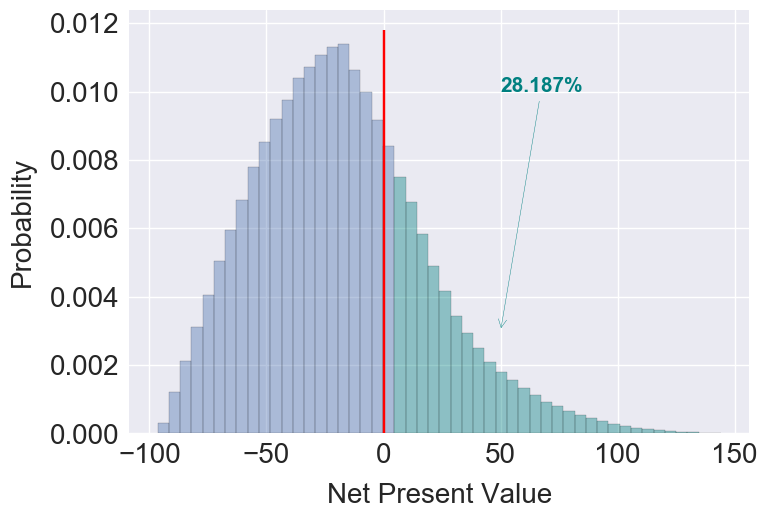

In [181]:
# sns.set_style("darkgrid")

# plt parameters
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes["npv"]


# plot a histogram of the NPVs
ax = sns.distplot(outcomes_data, kde=False, norm_hist = True)

ax.set_xlabel("Net Present Value",fontsize=20, labelpad=10)
ax.set_ylabel("Probability",fontsize=20, labelpad=10)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)


# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.0118, color='r', label='', colors="r")


# color bars greater than mean_diff except the partial bar
for rectangle in ax.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
        
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = len(data[indices_above_0])/len(data) *100

plt.annotate(str(positive_npvs_prob)+"%", xy=(50, 0.003), weight='bold', color='teal',
             xytext=(50, 0.01), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
        
# Save the plot
plt.savefig("Figures/CBA net present values", dpi=300, bbox_inches = "tight")

# 4. Scenario Discovery

In [182]:
np.percentile(outcomes["npv"], 80)

10.560861565089716

In [184]:
x = experiments
y = outcomes["npv"] > 0

prim_alg = prim.Prim(x,y, threshold=0.3)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 500000 points remaining, containing 141337 cases of interest


MemoryError: 

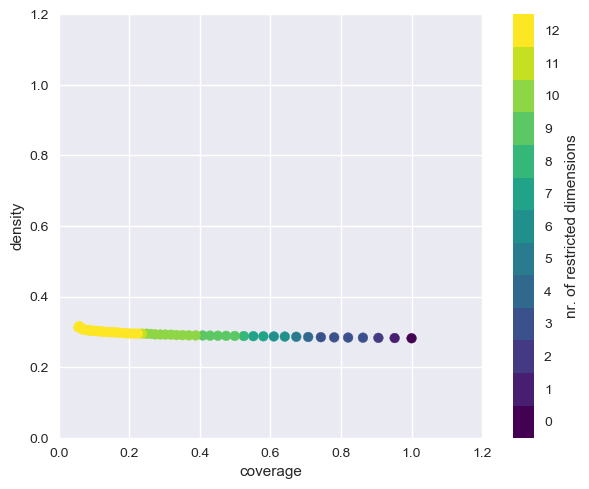

In [165]:
box1.show_tradeoff()
plt.savefig("Figures/Prim_Scenario_Discovery"+"_"+str(n_scenarios)+"_pealing_trajectory")
plt.show()

In [ ]:
box1.peeling_trajectory

In [ ]:
fig = box1.inspect(22,style='graph')
plt.show()

In [ ]:
box1.show_pairs_scatter(22).fig.set_size_inches(10,9)
plt.savefig("Figures/Prim_Scenario_Discovery"+"_"+str(n_scenarios))
plt.show(22)